In [1]:
import joblib
cv, x_train, x_test, y_train, y_test = joblib.load('imdb.pkl')

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model('imdb-sentiment.krs')

### 예측

In [3]:
model.predict(x_test.toarray())

array([[0.99994874],
       [0.9102891 ],
       [0.03367676],
       ...,
       [0.9292476 ],
       [0.9930454 ],
       [0.02877675]], dtype=float32)

In [4]:
y_pred = model.predict_classes(x_test.toarray())

### 혼돈행렬

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
confusion_matrix(y_test, y_pred)

array([[ 4984,  4071],
       [ 1587, 28226]], dtype=int64)

### 각종 지표

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
accuracy_score(y_test, y_pred)

0.8544303797468354

In [11]:
precision_score(y_test, y_pred)

0.8739511409728458

In [12]:
recall_score(y_test, y_pred)

0.9467681883741992

In [13]:
f1_score(y_test, y_pred)

0.9089035582031879

### threshold 조정

In [14]:
probs = model.predict(x_test.toarray())

In [15]:
y60 = (probs >= 0.6).astype(int)

In [16]:
confusion_matrix(y_test, y60)

array([[ 5929,  3126],
       [ 2509, 27304]], dtype=int64)

In [17]:
y40 = (probs >= 0.4).astype(int)

In [18]:
confusion_matrix(y_test, y40)

array([[ 4134,  4921],
       [ 1068, 28745]], dtype=int64)

### ROC-AUC

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [20]:
fpr, tpr, threshold = roc_curve(y_test, probs)

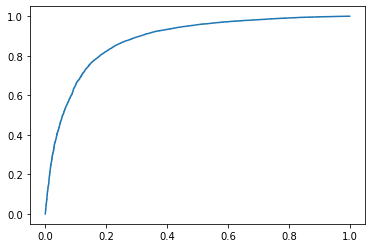

In [21]:
plt.plot(fpr, tpr)

In [22]:
roc_auc_score(y_test, probs)

0.8825059380352883